<a href="https://colab.research.google.com/github/VineetRoy1106/Log-Analysis2/blob/main/Log_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('HealthApp_2k.log_structured.csv')
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [99]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')
df['Date'] = df['Time'].dt.date
df['Hour'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.hour

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = df['Time'].dt.date

df = df[df["EventId"] == "E42"]
df['Steps'] = df['Content'].str.extract('(\d+)').astype(int)
df['StepDiff'] = df.groupby('Date')['Steps'].diff()

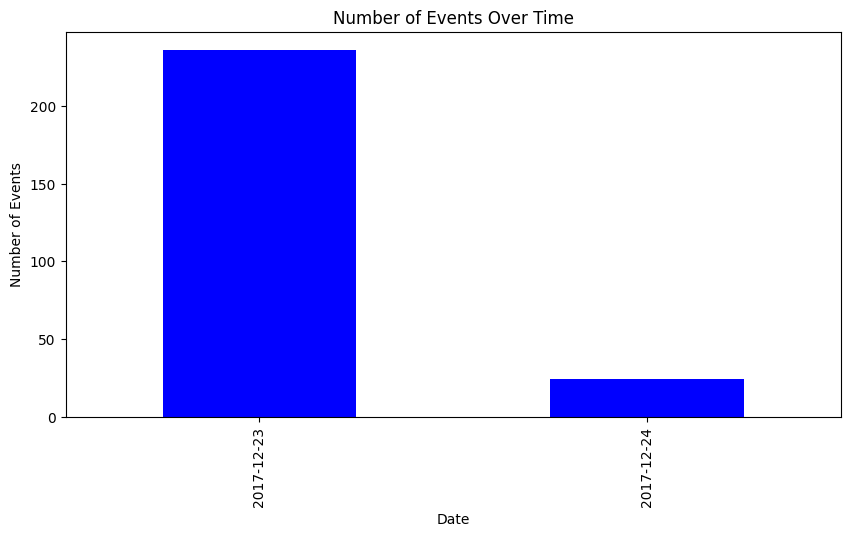

In [95]:

plt.figure(figsize=(10, 5))
df.groupby(df['Time'].dt.date)['LineId'].count().plot(kind='bar', color='blue')
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
def extract_total_calories(content):
    try:
        match = re.search(r"totalCalories=(\d+)", content)
        if match:
            return int(match.group(1))
        else:
            return None
    except Exception as e:
        print(f"Error extracting total calories: {e}")
        return None

In [106]:
hourly_calories_range.index= ([(2017-12-23, '10 PM'),
            (2017-12-23, '11 PM')],
           names=['Date', 'Hour12'])

MultiIndex([(2017-12-23, '10 PM'),
            (2017-12-23, '11 PM')],
           names=['Date', 'Hour12'])

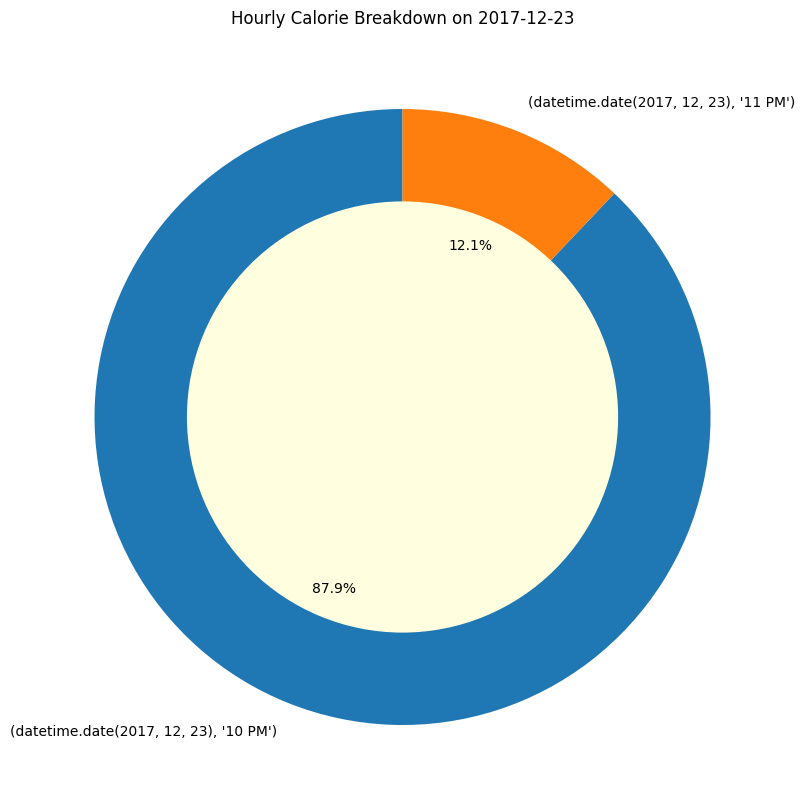

In [108]:
df["TotalCalories"] = df["Content"].apply(extract_total_calories)

# Extract the date and hour from the time column
df['Date'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.date
df['Hour'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.hour

# Filter DataFrame for "E4" events and only for the day (2017-12-23)
calorie_events = df[(df["EventId"] == "E4") & (df['Date'] == pd.to_datetime('2017-12-23').date())].copy()

# Convert the hour to 12-hour format
calorie_events['Hour12'] = pd.to_datetime(calorie_events['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.strftime('%I %p')

# Group by date and 12-hour format and calculate the range (max - min) of total calories for each hour
hourly_calories_range = calorie_events.groupby(['Date', 'Hour12'])['TotalCalories'].apply(lambda x: x.max() - x.min())

# Filter out entries with 0 percent
hourly_calories_range = hourly_calories_range[hourly_calories_range > 0]

# Create a doughnut chart
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(hourly_calories_range, labels=hourly_calories_range.index, autopct='%1.1f%%', startangle=90)

# Add a circle in the center to create a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='lightyellow')
fig.gca().add_artist(centre_circle)

plt.title('Hourly Calorie Breakdown on 2017-12-23')
plt.show()

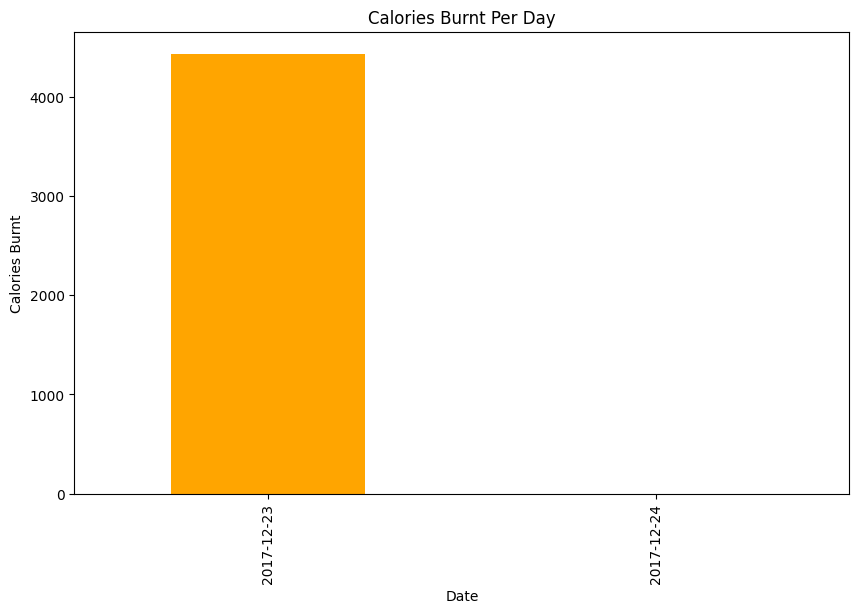

In [82]:
calorie_e4 = df[df["EventId"] == "E4"].copy()

# Apply the function to extract total calories and convert to float
calorie_e4["TotalCalories"] = calorie_e4["Content"].apply(extract_total_calories)

# Extract the date from the time column
calorie_e4['Date'] = pd.to_datetime(calorie_e4['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.date

# Group by date and calculate the difference in total calories for each day
daily_calories = (calorie_e4.groupby('Date')['TotalCalories'].max() -
                  calorie_e4.groupby('Date')['TotalCalories'].min())

# Plot the bar chart
plt.figure(figsize=(10, 6))
daily_calories.plot(kind='bar', color='orange')
plt.title('Calories Burnt Per Day')
plt.xlabel('Date')
plt.ylabel('Calories Burnt')
calorie_e4['Hour12'] = pd.to_datetime(calorie_e4['Time'], format='%Y%m%d-%H:%M:%S:%f').dt.strftime('%I %p')
plt.show()

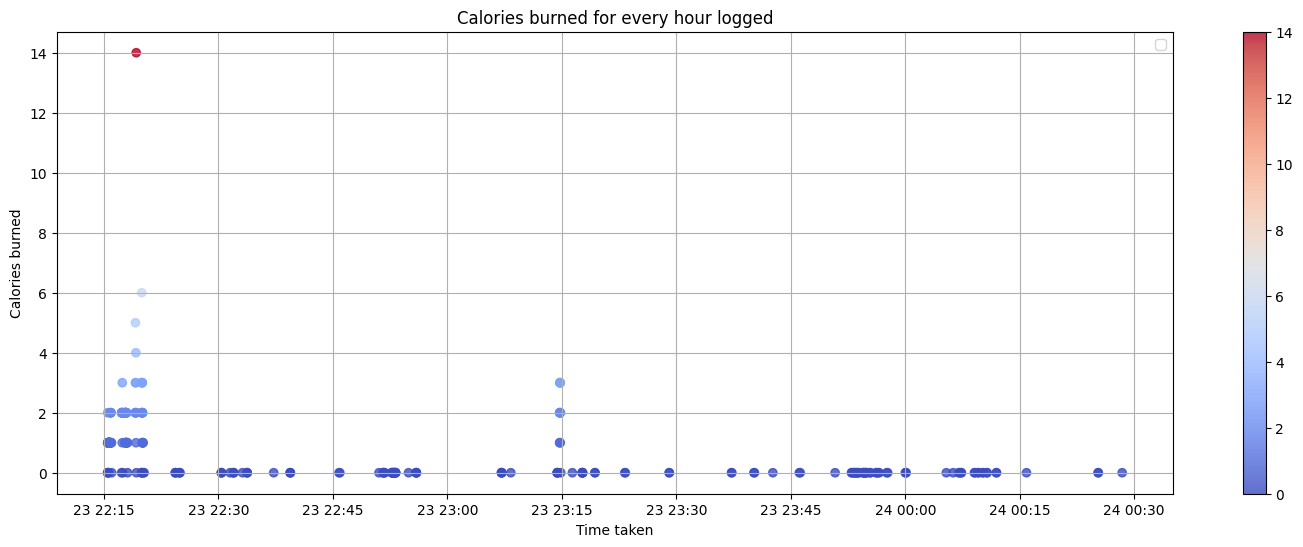

In [77]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(18,6)) # specify size of the chart
plt.scatter(df.Time, df.StepDiff,
            alpha = 0.8, c = df.StepDiff,
            cmap = "coolwarm")

plt.colorbar(orientation = "vertical")
plt.xlabel("Time taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.grid(True)
plt.legend()
plt.show()

Standing

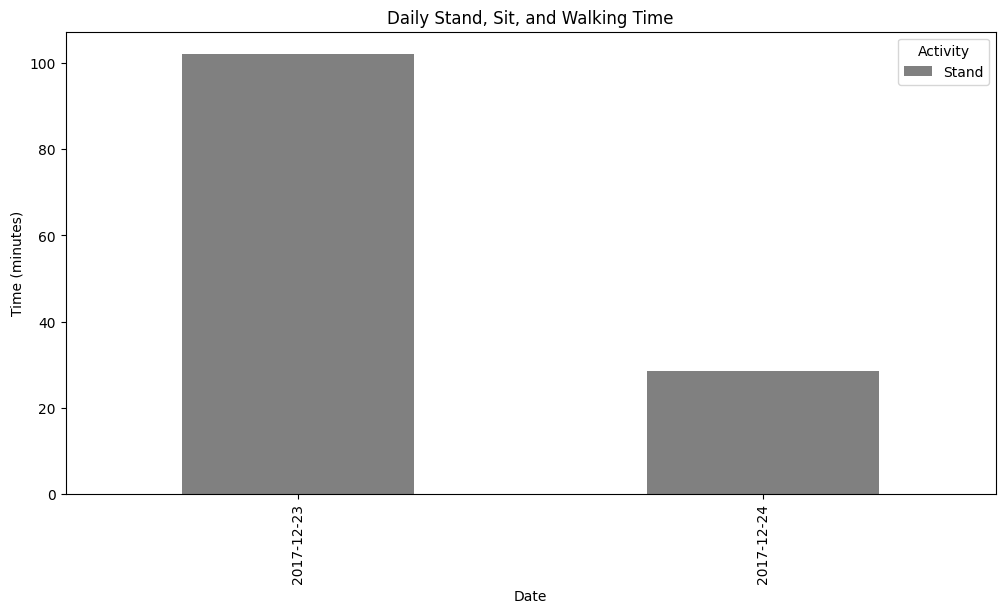

In [24]:
# Function to categorize events
def categorize_activity(content):
    if "onStandStepChanged" in content:
        return "Stand"
    elif "onSitStepChanged" in content:
        return "Sit"
    elif "onWalkingStepChanged" in content:
        return "Walking"
    else:
        return None

# Apply the function to create a new column 'Activity'
df['Activity'] = df['EventTemplate'].apply(categorize_activity)

# Convert 'Time' to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Group by date and activity, then calculate the total time spent on each activity
activity_time = df.groupby(['Date', 'Activity'])['Time'].agg(lambda x: (x.max() - x.min()).total_seconds() / 60)

# Unstack to reshape the data for better visualization
activity_time = activity_time.unstack()

# Plot the bar chart
activity_time.plot(kind='bar', color = 'grey',stacked=True, figsize=(12, 6))
plt.title('Daily Stand, Sit, and Walking Time')
plt.xlabel('Date')
plt.ylabel('Time (minutes)')
plt.legend(title='Activity', loc='upper right')
plt.show()

Screen Time

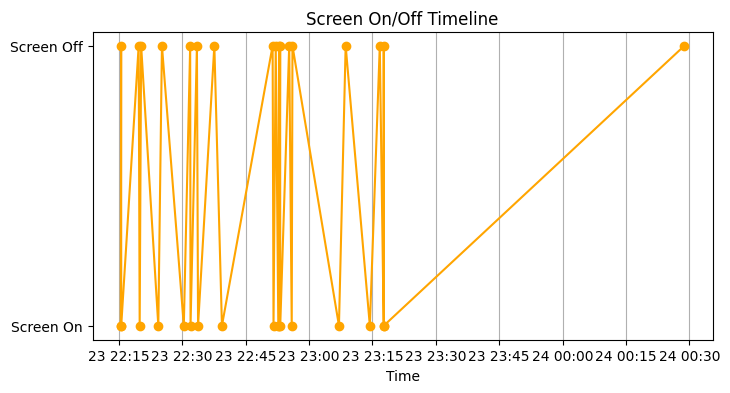

Time spent on the app: 71.12 minutes
Total screen on time: 2017-12-23 23:17:41.987000
Total screen off time: 0 days 00:33:46.826000


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize variables
screen_on_time = pd.Timestamp.min
screen_off_time = pd.Timestamp.min
screen_state = 'off'

# Create lists to store event data for plotting
event_types = []
event_times = []

# Iterate through the DataFrame
for index, row in df.iterrows():
    event_id = row['EventId']
    event_time = row['Time']

    # Check if the event is a screen on event
    if event_id == 'E41':
        screen_state = 'on'
        screen_on_time = event_time
    # Check if the event is a screen off event
    elif event_id == 'E40':
        if screen_state == 'on':
            screen_off_time = event_time
            screen_state = 'off'

            # Store screen on and off events for plotting
            event_types.extend(['Screen On', 'Screen Off'])
            event_times.extend([screen_on_time, screen_off_time])

# Sort the events by time
sorted_events = sorted(zip(event_times, event_types))

# Extract sorted event times and types
sorted_times, sorted_types = zip(*sorted_events)

# Plot the timeline
plt.figure(figsize=(8, 4))
plt.plot(sorted_times, sorted_types, marker='o',linestyle='-', color='orange')
plt.title('Screen On/Off Timeline')
plt.xlabel('Time')
plt.yticks(['Screen On', 'Screen Off'])
plt.grid(axis='x')

# Display time spent on the app
time_spent_on_app = (screen_off_time - screen_on_time).total_seconds() / 60  # Convert to minutes
plt.show()

# Optionally, you can display the total screen on and off times
print(f'Time spent on the app: {time_spent_on_app:.2f} minutes')
print(f'Total screen on time: {screen_on_time}')
print(f'Total screen off time: {df["Time"].max() - screen_off_time}')


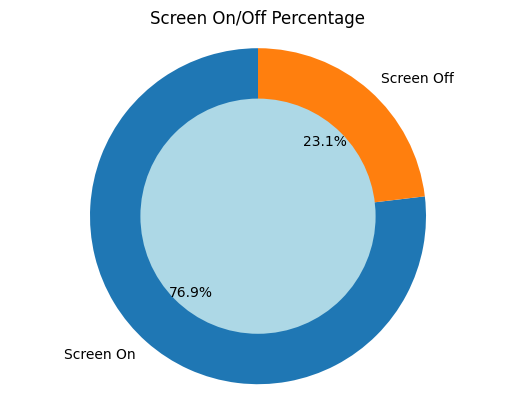

In [68]:
# Assuming 'data' is your provided list of tuples
screen_events_df = pd.DataFrame(sorted_events, columns=['Timestamp', 'Status'])

# Calculate the duration of each status
screen_events_df['Duration'] = screen_events_df['Timestamp'].diff().shift(-1).fillna(pd.Timedelta(seconds=0))
on_duration = screen_events_df[screen_events_df['Status'] == 'Screen On']['Duration'].sum()
off_duration = screen_events_df[screen_events_df['Status'] == 'Screen Off']['Duration'].sum()

# Calculate percentages
total_duration = on_duration + off_duration
on_percentage = (on_duration / total_duration) * 100
off_percentage = (off_duration / total_duration) * 100

# Create a doughnut chart
labels = ['Screen On', 'Screen Off']
sizes = [on_percentage, off_percentage]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a circle in the center to create a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Screen On/Off Percentage')
plt.show()